# Sunshield Design Considerations

Should put calculations of Earth limb angle and balloon angular size here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c

How long does the scoop need to be to block Earth limb?  Claim
\begin{align}
L = \frac{D}{\tan(\lambda + \theta)} + M
\end{align}
where 

In [2]:
lmbda = 5*u.deg
theta = 20*u.deg # minimum elevation
D = 2.5*u.m # bit conservative
M = 2.5*u.m # f/1

def scoop_length(D, M, lmbda, theta):
    
    return D/np.tan(lmbda + theta) + M

In [3]:
scoop_length(D, M, lmbda, theta)

<Quantity 7.8612673 m>

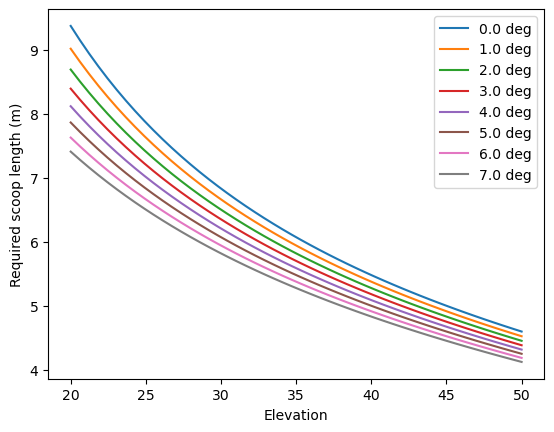

In [7]:
thetas = np.linspace(20, 50)*u.deg
lmbdas = np.arange(0,8)*u.deg
for lmbda in lmbdas:
    plt.plot(thetas, scoop_length(D, M, lmbda, thetas), label=lmbda)
plt.ylabel('Required scoop length (m)')
plt.xlabel('Elevation')
plt.legend();